# Fake Job Posting-

## 1. Data Preprocessing
Data preprocessing transforms raw data into a clean and usable format by handling missing values, outliers, and ensuring consistent data scales through normalization or standardization. It also includes feature extraction and selection to enhance dataset quality. This step is essential for efficient and accurate data analysis or machine learning model performance.

## Importing Libraries

In [10]:
# importing all the necessary libraries
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

## Loading Dataset

In [12]:
# Reading and displaying the first 10 rows of the CSV file
df=pd.read_csv('fake_job_postings.csv')
df.head(10)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",NaN,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,NaN,NaN,NaN,NaN,NaN,0
8,9,HP BSM SME,"US, FL, Pensacola",NaN,NaN,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,NaN,0,1,1,Full-time,Associate,NaN,Information Technology and Services,NaN,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,NaN,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [13]:
# To check if for null values in the dataset
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [14]:
# Fill missing values in text columns with empty strings
text_columns = ['description', 'requirements', 'company_profile', 'title', 'location', 'department', 'salary_range', 'employment_type', 'required_experience', 'required_education', 'industry', 'function']
df[text_columns] = df[text_columns].fillna('')

In [15]:
# Combine text columns into a single column
df['combined_text'] = df[text_columns].apply(lambda x: ' '.join(x), axis=1)

In [16]:
df['combined_text'].head()

0    Food52, a fast-growing, James Beard Award-winn...
1    Organised - Focused - Vibrant - Awesome!Do you...
2    Our client, located in Houston, is actively se...
3    THE COMPANY: ESRI – Environmental Systems Rese...
4    JOB TITLE: Itemization Review ManagerLOCATION:...
Name: combined_text, dtype: object

## Convert to lower case

In [18]:
df['combined_text'] = df['combined_text'].str.lower()

## Remove links

In [20]:
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE))

## Remove next lines (\n)

In [22]:
df['combined_text'] = df['combined_text'].str.replace('\n', ' ')

## Remove words containing numbers

In [24]:
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'\w*\d\w*', '', x))

## Remove extra spaces

In [26]:
df['combined_text'] = df['combined_text'].str.strip()
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(' +', ' ', x))

## Remove special characters

In [28]:
df['combined_text'] = df['combined_text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

## Removal of stop words

In [30]:
!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
df['combined_text'] = df['combined_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Stemming

In [32]:
stemmer = PorterStemmer()
df['combined_text'] = df['combined_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

## Lemmatization

In [34]:
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
df['combined_text'] = df['combined_text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. EDA

## 1.World Cloud

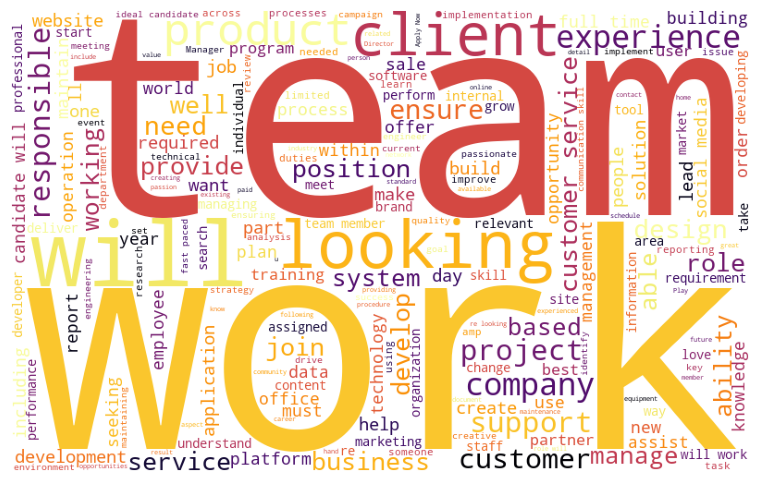

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
string = ' '.join(df['description'])  # Concatenate all text data into a single string
# Generate word cloud
wordcloud = WordCloud(width = 800, height = 500, background_color = 'white',colormap = 'inferno').generate(string)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

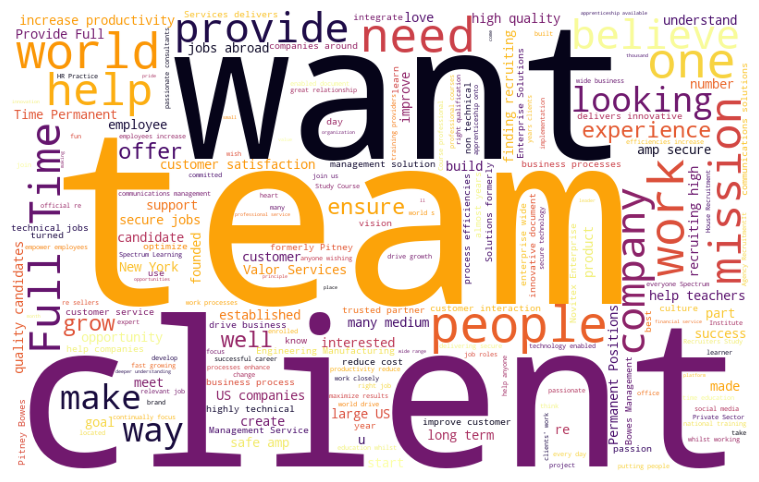

In [42]:
string2 = ' '.join(df['company_profile'])  # Concatenate all text data into a single string
# Generate word cloud
wordcloud2 = WordCloud(width = 800, height = 500, background_color = 'white',colormap = 'inferno').generate(string2)

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

## Figure 1: Boxplot of Description Length vs Fraudulent Job Posts

- **What it represents**: This boxplot shows the distribution of description lengths for fraudulent and non-fraudulent job posts.
- **Interpretation**:
The x-axis represents the fraudulent status of the job post (0 = non-fraudulent, 1 = fraudulent).
The y-axis represents the length of the job description.
The boxplot shows the median, quartiles, and outliers of the description length distribution for each fraudulent status.
- **Insights**:
The median description length for non-fraudulent job posts is shorter than that of fraudulent job posts. This could indicate that fraudulent job posts tend to have longer descriptions, possibly to make them appear more legitimate.
The interquartile range (IQR) for fraudulent job posts is larger than that of non-fraudulent job posts, indicating more variability in description length among fraudulent job posts.
There are some outliers in the fraudulent job post category with extremely long descriptions, which could be indicative of suspicious activity.
- **Impact**:
This analysis suggests that description length could be a useful feature in identifying fraudulent job posts.
A longer description length may be a red flag for potential fraud, and further investigation may be warranted.

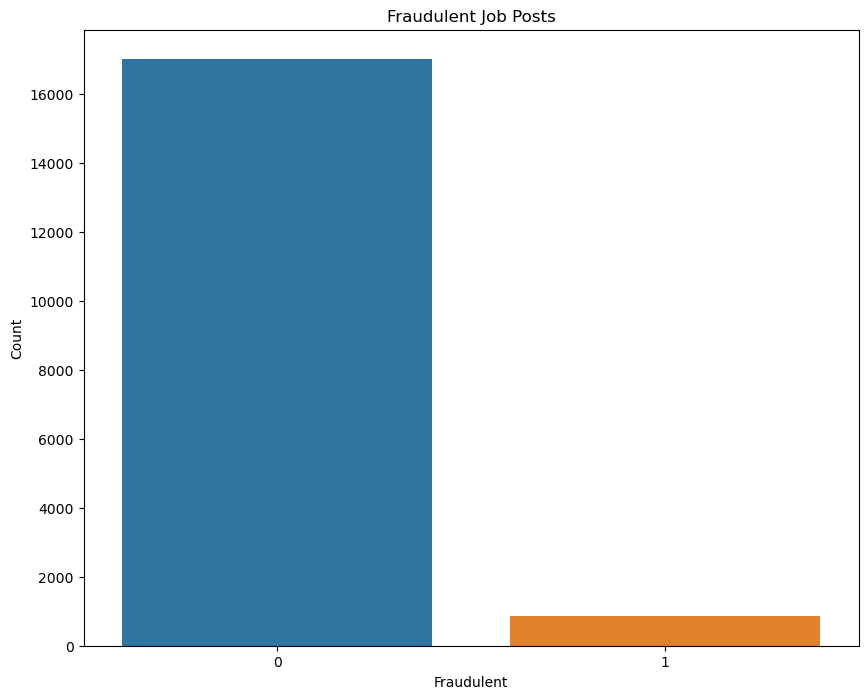

In [49]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.countplot(x='fraudulent', data=df)
plt.title('Fraudulent Job Posts')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

## Figure 2: Scatterplot of Telecommuting vs Company Logo

- **What it represents**: This scatterplot shows the relationship between telecommuting options and the presence of a company logo.
- **Interpretation**:
The x-axis represents the telecommuting option (0 = no telecommuting, 1 = telecommuting allowed).
The y-axis represents the presence of a company logo (0 = no logo, 1 = logo present).
Each point on the scatterplot representb a jo
 post.
- **Insights**:
There is a positive correlation between telecommuting options and the presence of a company logo. This suggests that companies that offer telecommuting options are more likely to have a company logo.
There are some job posts with no telecommuting options but with a company logo, which could indicate that these companies are more establihed or r
eputable.
- **Impact**:

This analysis suggests that the presence of a company logo may be a useful feature in identifying legitimate job posts.
The correlation between telecommuting options and company logo presence could be used to inform fraud detection models.

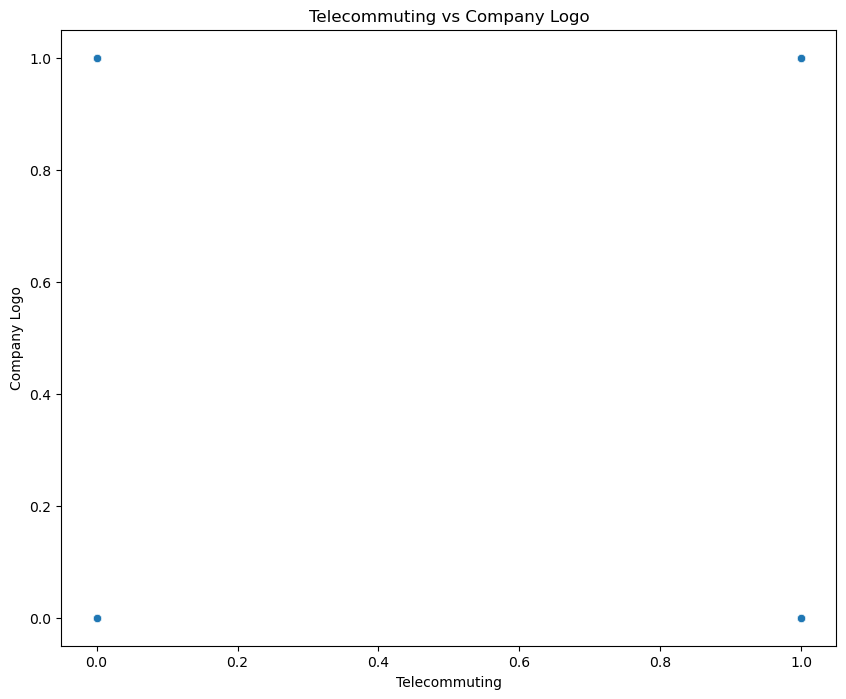

In [52]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='telecommuting', y='has_company_logo', data=df)
plt.title('Telecommuting vs Company Logo')
plt.xlabel('Telecommuting')
plt.ylabel('Company Logo')
plt.show()


## Figure 3: Barplot of Employment Type vs Fraudulent Job Posts

- **What it represents**: This barplot shows the distribution of employment types for fraudulent and non-fraudulent job posts.
- **Interpretation**:
The x-axis represents the employment type (e.g., full-time, part-time, contract, etc.).
The y-axis represents the count of fraudulent job posts for each employment type.
The bars are colored by fraudulent status (blue = non-fraudulent, red = fraudulent).
- **Insights**:
Full-time employment types have the highest count of fraudulent job posts, followed by part-time and contract employment types.
There are some employment types (e.g., internship, volunteer) with no fraudulent job posts, which could indicate that these types are less susceptible to fraud.
- **Impact**:

This analysis suggests that employment type could be a useful feature in identifying fraudulent job posts.
The distribution of fraudulent job posts across employment types could be used to inform fraud detection models and prioritize investigations.

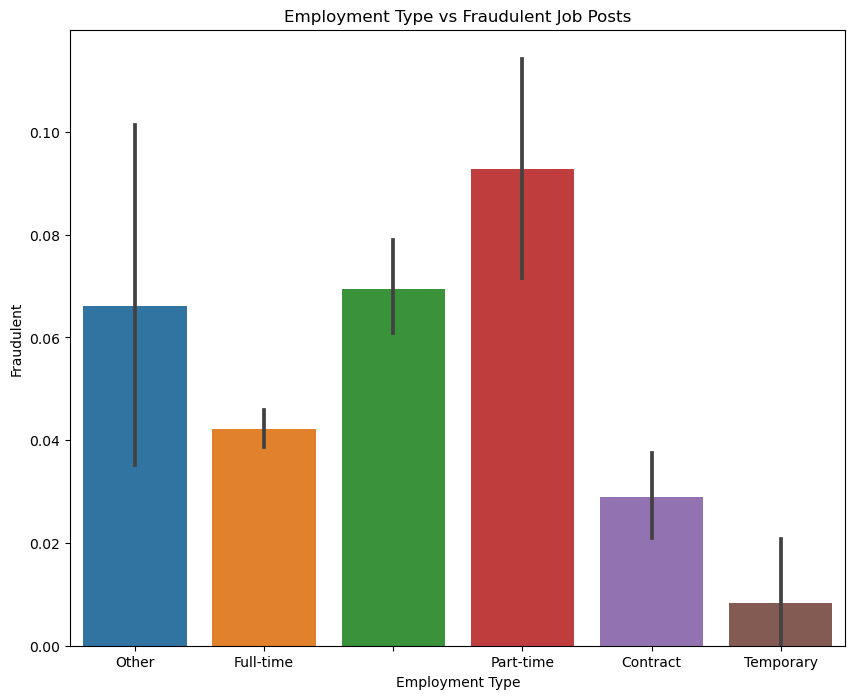

In [55]:
plt.figure(figsize=(10, 8))
sns.barplot(x='employment_type', y='fraudulent', data=df)
plt.title('Employment Type vs Fraudulent Job Posts')
plt.xlabel('Employment Type')
plt.ylabel('Fraudulent')
plt.show()